# ECE 271A HW1

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.fftpack import dct

# a)

In [2]:
train_samples = loadmat('./data/TrainingSamplesDCT_8.mat')

In [3]:
print(train_samples.keys())

dict_keys(['__header__', '__version__', '__globals__', 'TrainsampleDCT_FG', 'TrainsampleDCT_BG'])


In [4]:
train_samples_fg = train_samples['TrainsampleDCT_FG']
train_samples_bg = train_samples['TrainsampleDCT_BG']
print(train_samples_fg.shape)
print(train_samples_bg.shape)

(250, 64)
(1053, 64)


In [5]:
bgfg = train_samples_fg.shape[0] + train_samples_bg.shape[0]
p_cheetah = train_samples_fg.shape[0] / bgfg
p_grass = train_samples_bg.shape[0] / bgfg
print('P(cheetah) = {}'.format(p_cheetah))
print('P(grass) = {}'.format(p_grass))

P(cheetah) = 0.1918649270913277
P(grass) = 0.8081350729086723


# b)

In [6]:
sorted_train_samples_fg = np.argsort(train_samples_fg, axis=1)
sorted_train_samples_bg = np.argsort(train_samples_bg, axis=1)

In [7]:
fg_index = np.zeros(sorted_train_samples_fg.shape[0])
bg_index = np.zeros(sorted_train_samples_bg.shape[0])
for index, vector in enumerate(sorted_train_samples_fg):
    fg_index[index] = vector[-2]
for index, vector in enumerate(sorted_train_samples_bg):
    bg_index[index] = vector[-2]
fg_probability = fg_index/fg_index.size
bg_probability = bg_index/bg_index.size
print(fg_probability.shape)
print(bg_probability.shape)

(250,)
(1053,)


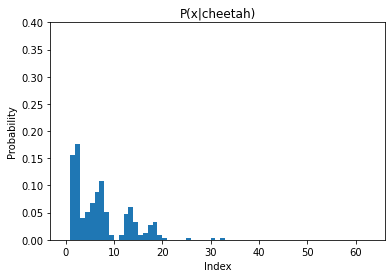

In [8]:
plt.hist(fg_index, bins = [i for i in range(sorted_train_samples_fg.shape[1])], density=True)
plt.ylim(top=0.4)
plt.title('P(x|cheetah)')
plt.xlabel('Index')
plt.ylabel('Probability')
plt.show()

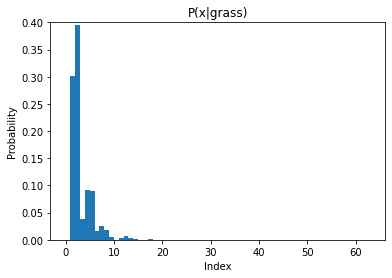

In [9]:
plt.hist(bg_index, bins = [i for i in range(sorted_train_samples_bg.shape[1])], density=True) 
plt.ylim(top=0.4)
plt.title('P(x|grass)')
plt.xlabel('Index')
plt.ylabel('Probability')
plt.show()

# c)

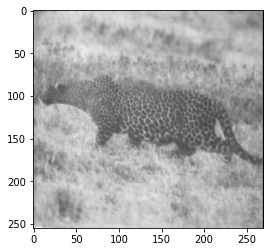

In [10]:
image = np.array(imageio.imread('./data/cheetah.bmp'), dtype=np.float64)/255
plt.imshow(image, cmap='gray')

In [11]:
padded_image = np.pad(image, 4, mode='constant')
print(image.shape)
print(padded_image.shape)

(255, 270)
(263, 278)


In [12]:
zig_zag = np.genfromtxt('./data/zig_zag_pattern.txt', dtype=np.int64).flatten()
print(zig_zag)

[ 0  1  5  6 14 15 27 28  2  4  7 13 16 26 29 42  3  8 12 17 25 30 41 43
  9 11 18 24 31 40 44 53 10 19 23 32 39 45 52 54 20 22 33 38 46 51 55 60
 21 34 37 47 50 56 59 61 35 36 48 49 57 58 62 63]


In [13]:
A = np.zeros(image.shape)
for i in range(padded_image.shape[0]-8):
    for j in range(padded_image.shape[1]-8):
        block = padded_image[i:i+8,j:j+8]
        transformed_block = np.absolute(dct(dct(block.T, norm='ortho').T, norm='ortho')).flatten()
        sorted_index = np.argsort(transformed_block)
        A[i,j] = p_cheetah*fg_probability[zig_zag[sorted_index[-2]]] < p_grass*bg_probability[zig_zag[sorted_index[-2]]]
print(A.shape)

(255, 270)


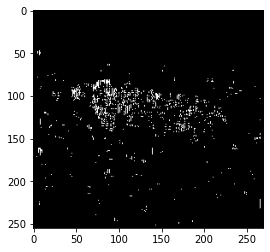

In [14]:
plt.imshow(A, cmap='gray')

# d)

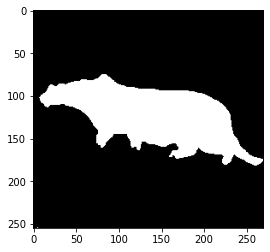

In [15]:
ground_truth = np.array(imageio.imread('./data/cheetah_mask.bmp'), dtype=np.float64)/255
plt.imshow(ground_truth, cmap='gray')

In [16]:
error = A != ground_truth
error_sum = np.sum(error)
p_error = error_sum / A.size
print('P(error) = {}'.format(p_error))
print('Accuracy percentage = {}'.format(1-p_error))

P(error) = 0.17982570806100218
Accuracy percentage = 0.8201742919389978
